# ML Modeling, Linear Model
Goal
---
1. scikit-learning Introduction
2. CO2 emisssion 

Reference
---
1. [src](https://medium.com/joguei-os-dados/week-3-predicting-co2-emissions-70e554ad2276)
2. [Dataset, Kaggle](https://www.kaggle.com/gangliu/oc2emission/tasks), dataset contains information of CO2 emission from cars.

Questions
---
1. what is the correlation between the engine motor of the car and its CO2 emission? 
2. Is it possible to create a model that predicts the amount of polution on future motors? How and Why?

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#matplotlib inline

In [2]:
## atributing dataset to a dataframe df
df = pd.read_csv('data/FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [5]:
# describing statiscal measures
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Exploratory analysis
1. correwlation between pairs

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [18]:
num_features=list(df.select_dtypes(include='number').columns)

<ipython-input-14-7d11f27a72e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


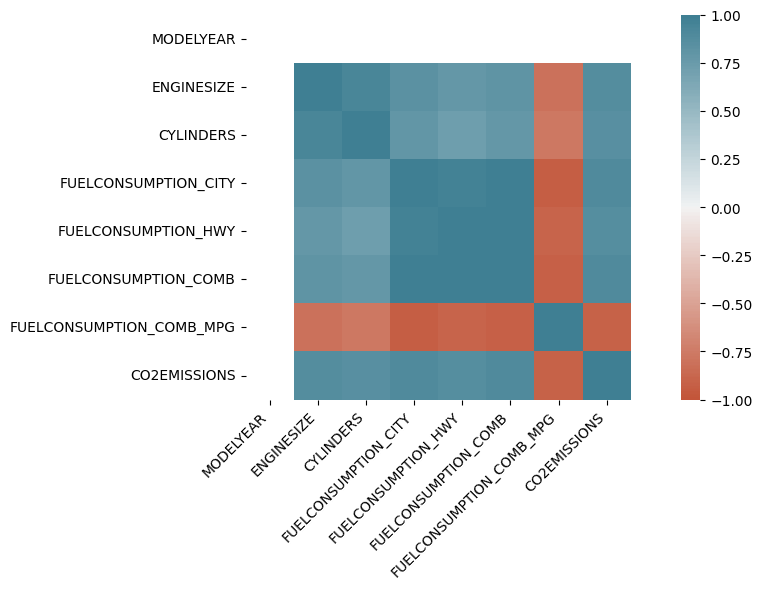

In [14]:
# correlation matrix to measure the strenght of the correlation between features
plt.figure(figsize=(13,5))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

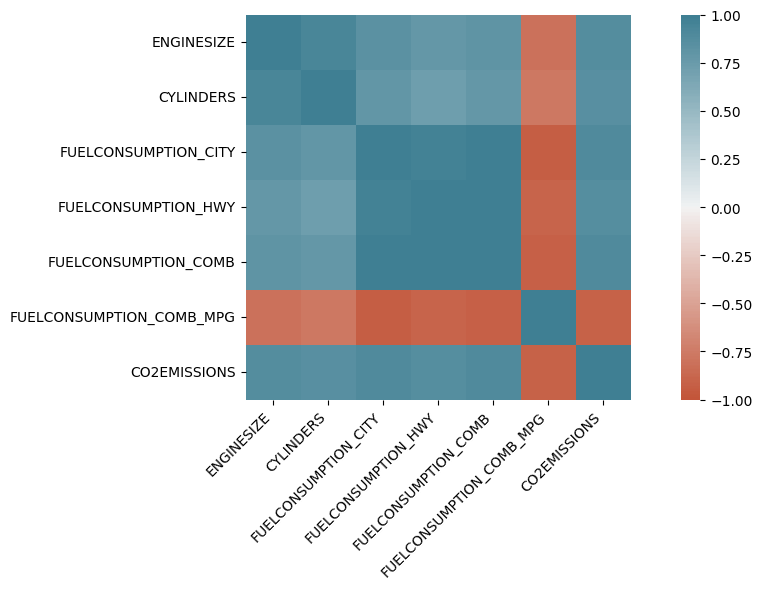

In [27]:
# correlation matrix to measure the strenght of the correlation between features
plt.figure(figsize=(13,5))
corr = df[num_features[1:]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [26]:
# only one category
df['MODELYEAR'].nunique()

1

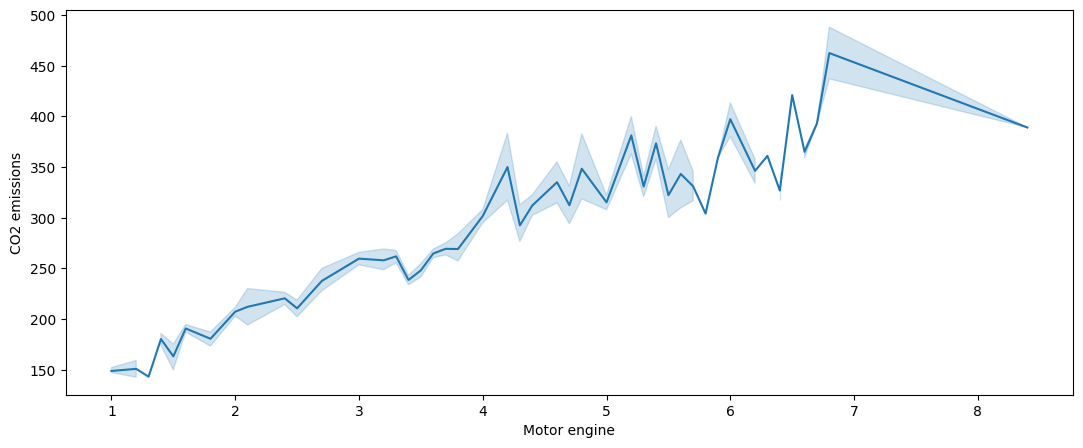

In [29]:
# ploting graph engine size x CO2 emissions
plt.figure(figsize=(13,5))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions')
plt.show()

The lineplot shows a positive correlation between the size/power of the engine motor and the carbon emission. With some variation, we can say that the bigger the engine the greater the levels of CO2 emited. 

[BONUS]
---
What are the differences of the techniques of Car manufacture among different countries?

In [ ]:
!pip install mplcyberpunk

In [33]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [110]:
df.groupby('MAKE')[['ENGINESIZE','CYLINDERS']].agg(pd.Series.mode)
#com_df.loc['TOYOTA','ENGINESIZE']=2.5
#com_df.loc['BENTLEY','CYLINERS']=10


,ENGINESIZE,CYLINDERS
MAKE,,
ACURA,3.5,6
ASTON MARTIN,4.7,8
AUDI,3.0,6
BENTLEY,6.0,"[8, 12]"
BMW,3.0,6
...,...,...
SRT,8.4,10
SUBARU,"[2.0, 2.5]",4
TOYOTA,"[1.8, 3.5]",4


In [6]:
com_df=df.groupby('MAKE')[['ENGINESIZE','CYLINDERS']].agg(lambda x:x.mode()[0])#.reset_index()

In [7]:
com_df.index

Index(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK', 'CADILLAC',
       'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ',
       'MINI', 'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RAM', 'ROLLS-ROYCE',
       'SCION', 'SMART', 'SRT', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype='object', name='MAKE')

In [8]:
com_df=com_df.loc[['AUDI','BMW','CHEVROLET','HYUNDAI', 'LINCOLN','PORSCHE','TOYOTA']]
com_df

,ENGINESIZE,CYLINDERS
MAKE,,
AUDI,3.0,6
BMW,3.0,6
CHEVROLET,5.3,8
HYUNDAI,2.0,4
LINCOLN,3.7,6
PORSCHE,3.8,6
TOYOTA,1.8,4


In [9]:
MAKER=list(com_df.index)
Enginesize=list(com_df['ENGINESIZE'])
Cylinders=list(com_df['CYLINDERS'])

In [10]:
MAKER = [*MAKER, MAKER[0]]
Enginesize = [*Enginesize, Enginesize[0]]
Cylinders = [*Cylinders, Cylinders[0]]

Maker = np.linspace(start=0, stop=2 * np.pi, num=len(MAKER))

In [11]:
MAKER

['AUDI', 'BMW', 'CHEVROLET', 'HYUNDAI', 'LINCOLN', 'PORSCHE', 'TOYOTA', 'AUDI']

In [12]:
Enginesize

[3.0, 3.0, 5.3, 2.0, 3.7, 3.8, 1.8, 3.0]

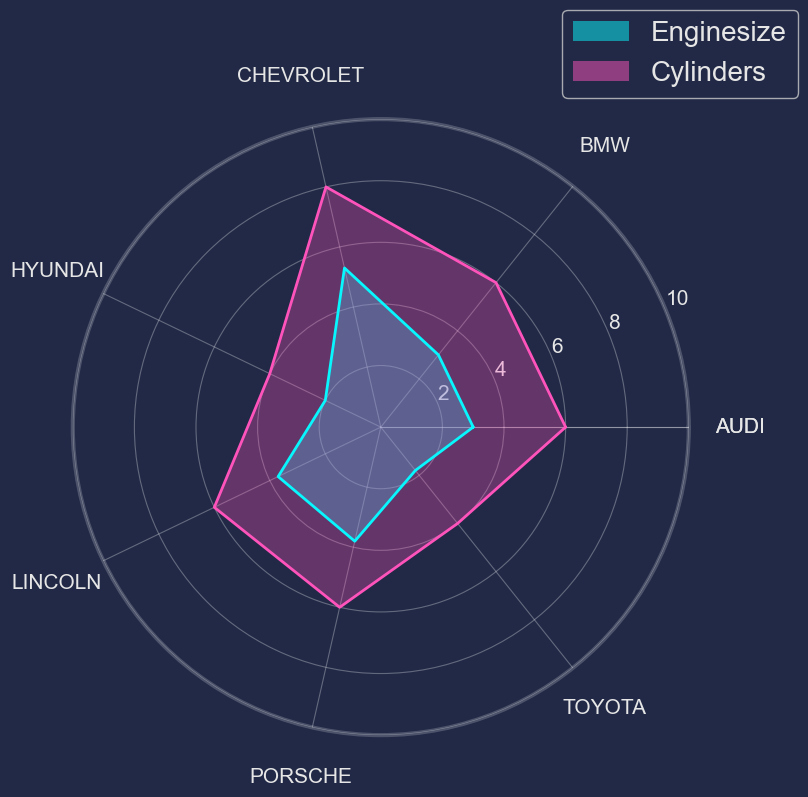

In [15]:
from matplotlib.patches import Patch
import mplcyberpunk

with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    ax.plot(Maker, Enginesize, lw=2)
    ax.plot(Maker, Cylinders, lw=2)

    ax.fill(Maker, Enginesize, alpha=0.3)
    ax.fill(Maker, Cylinders, alpha=0.3)

    lines, labels = plt.thetagrids(np.degrees(Maker), labels=MAKER)

    ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

    ax.spines['polar'].set_linewidth(3)
    
    edge_color = (1, 1, 1, 0.2) 
    ax.spines['polar'].set_color(edge_color) 
    
    ax.grid(color='white', alpha=0.3)
    
    ax.set_ylim(0, 10)
    
    # Create custom legend handles
    Enginesize_legend = Patch(facecolor='C0', alpha=0.5, label='Enginesize')
    Cylinders_legend = Patch(facecolor='C1', alpha=0.5, label='Cylinders')

    # Add a legend with custom position and handles
    ax.legend(handles=[Enginesize_legend, Cylinders_legend],
              bbox_to_anchor=(1.2, 1.2), fontsize=20, 
              frameon=True)


    plt.show()

Model selection
---
1. what is the suitable model?
2. ML Modeling 
3  prediction/Estimation and Error discussion

### Spliting data to train the model

In [16]:
# importing necessary libraries
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
# features into variables
engine= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]


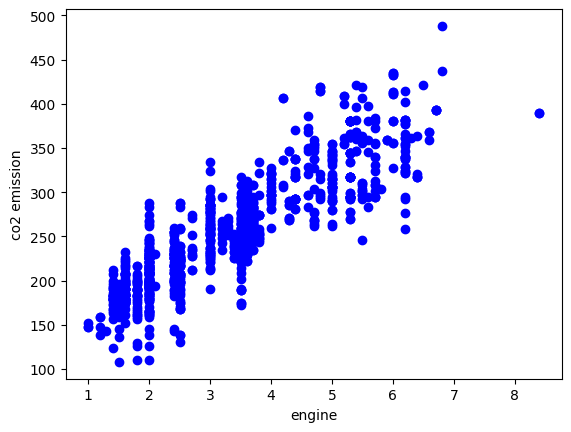

In [18]:
# ploting the correlation between features
plt.scatter(engine, co2, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

The datapoints on the scatterplot indicates that is possible to do a linear regression with this dataset, although the amount of residual.

In [19]:
# spliting data in train and test with train_test_split
engine_train, engine_test, co2_train, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

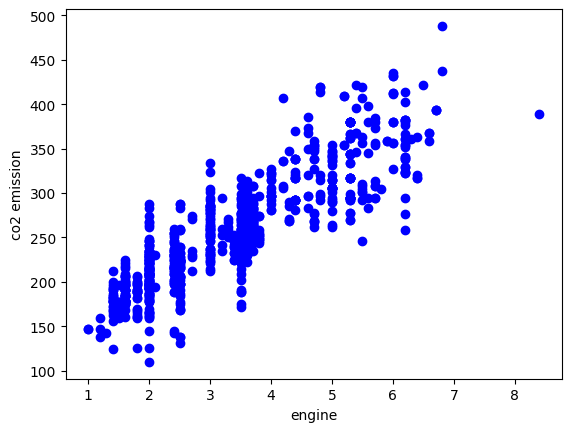

In [20]:
# ploting the correlation between features
plt.scatter(engine_train, co2_train, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

### Creating the model with the train dataset

In [21]:
# creating a linear regression model
# LinearRegression is a method of sklearn
modelo = linear_model.LinearRegression()

In [22]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B (always do it in the train dataset)
modelo.fit(engine_train, co2_train)

LinearRegression()

Estimated Linear Model
---
Data: $(x^i,y^i)$'s pair
$$ \hat y= A x+B$$

In [23]:
# exibiting the coeficients A and B that the model generated
print(f'(B) intercept: {modelo.intercept_} | (A) inclination: {modelo.coef_}')

(B) intercept: [126.28970217] | (A) inclination: [[38.99297872]]


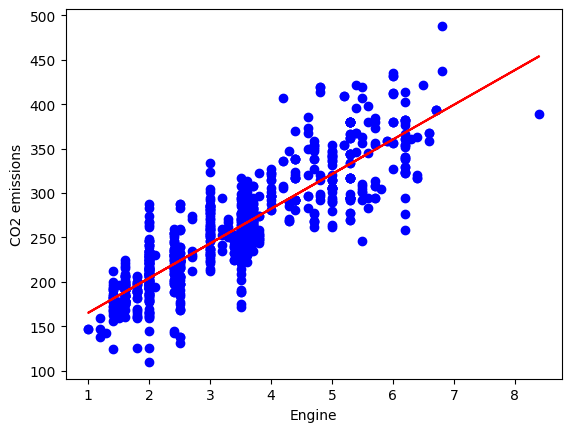

In [24]:
# print linear regression line on our TRAIN dataset
plt.scatter(engine_train, co2_train, color='blue')
plt.plot(engine_train, modelo.coef_[0][0]*engine_train + modelo.intercept_[0], '-r') 

plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Executing the model on the test dataset
First: predictions on the 'test' dataset

In [25]:
predictCO2 = modelo.predict(engine_test)

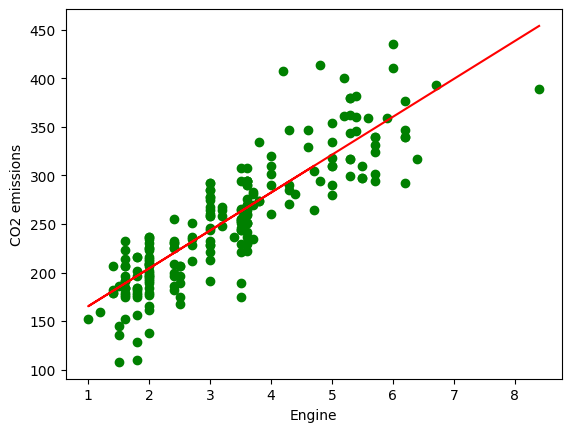

In [26]:
# print linear regression line on our TEST dataset
plt.scatter(engine_test, co2_test, color='green')
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Evaluating the model

In [27]:
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - co2_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, predictCO2)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(co2_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, predictCO2))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predictCO2, co2_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274999
Mean absolute error (MAE): 24.09725741170784
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534


All of the metrics above help evaluate the acuracy of the model. r2, for instance, is 0.68: this means that our linear regression model (values A and B given) is able to explain 68% of the variance between the CO2 emission and engine of the cars. 

The usual benchmark for this metric is 0.70.

[Group Practicing]
---
As same as the processing for estimated between `Engingesize ➡︎ CO2 emission`, now consider make a practicing for
`Cylinders ➡︎ CO2 emission`.

In [34]:
# features into variables
cylinders= df[['CYLINDERS']]
co2 = df[['CO2EMISSIONS']]

In [58]:
def LinearModel(X,y,features_,split_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=42)
    reg_model = linear_model.LinearRegression()
    reg_model.fit(X_train, y_train)
    # exibiting the coeficients A and B that the model generated
    #print(f'(B) intercept: {reg_model.intercept_} | (A) inclination: {reg_model.coef_}') 
    #print("Estimated Linear Model\n [CO2]=")
    # Get the coefficients and intercept
    coeffs = reg_model.coef_
    intercept = reg_model.intercept_

    # Create a string representation of the expression
    expr = "[CO2 Emission] = {:.2f}".format(intercept)
    for i in range(len(coeffs)):
        expr += " + {:.2f}[{}]".format(coeffs[i], features_[i])

    # Print out the expression
    print("===\n",expr,"\n===")
    
    predict_= reg_model.predict(X_test)
    if (len(X)==1):
        plt.scatter(X_test, y_test, color='green')
        plt.plot(X_test, reg_model.coef_[0][0]*X_test + reg_model.intercept_[0], '-r')
        plt.ylabel('CO2 emissions')
        plt.xlabel(feature_)
        plt.show()
    
    
    # Showing metrics to check the acuracy of our model
    print(f'Sum of squared error (SSE): {np.sum((predict_ - y_test)**2)}') # SSE: sum all of the  residuals and square them. 
    print(f'Mean squared error (MSE): {mean_squared_error(y_test, predict_)}') # MSE: avg of SSE
    print(f'Mean absolute error (MAE): {mean_absolute_error(y_test, predict_)}')
    print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(y_test, predict_))}') # RMSE: sqrt of the MSE
    print(f'R2-score: {r2_score(predict_, y_test)}') # r2-score: explains the variance of the variable Y when it comes to X

In [63]:
X=df[['CYLINDERS']]
y=df['CO2EMISSIONS']
features=list(X.columns)

LinearModel(X,y,features)

===
 [CO2 Emission] = 86.09 + 29.48[CYLINDERS] 
===
Sum of squared error (SSE): 237400.46673693624
Mean squared error (MSE): 1109.3479754062441
Mean absolute error (MAE): 25.71492764830526
Sqrt of mean squared error (RMSE):  33.306875797742485
R2-score: 0.5720444008167722


In [65]:
X=df[['ENGINESIZE']]
y=df['CO2EMISSIONS']
features=list(X.columns)

LinearModel(X,y,features)

===
 [CO2 Emission] = 126.29 + 38.99[ENGINESIZE] 
===
Sum of squared error (SSE): 210990.76821468497
Mean squared error (MSE): 985.9381692274999
Mean absolute error (MAE): 24.09725741170784
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534


In [69]:
X=df[['ENGINESIZE','CYLINDERS']]
y=df['CO2EMISSIONS']
features=features=list(X.columns)
LinearModel(X,y,features)

===
 [CO2 Emission] = 111.38 + 28.94[ENGINESIZE] + 8.38[CYLINDERS] 
===
Sum of squared error (SSE): 199194.5776225211
Mean squared error (MSE): 930.8157832828089
Mean absolute error (MAE): 23.75490275810292
Sqrt of mean squared error (RMSE):  30.509273725915026
R2-score: 0.6902786737296868


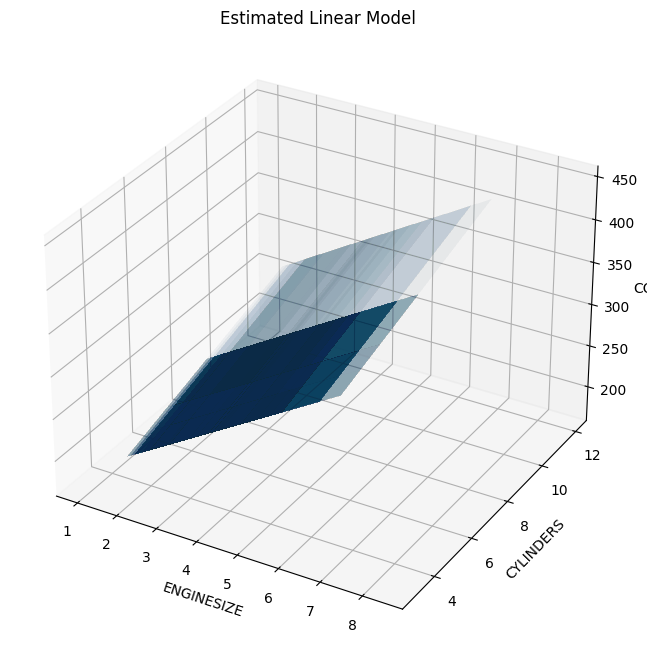

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# Fit the linear model
model = linear_model.LinearRegression().fit(X, y)

# Get the coefficients and intercept
A1, A2 = model.coef_
C = model.intercept_

# Create a meshgrid of X and Y values
X1, X2 = np.meshgrid(X['ENGINESIZE'],X['CYLINDERS'])
Y = A1*X1 + A2*X2 + C

# Create the 3D plot
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
#ax.scatter(X['ENGINESIZE'], X['CYLINDERS'], y)

# Plot the estimated plane
ax.plot_surface(X1, X2, Y, alpha=0.01)

# Add labels and title
ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('CO2')
ax.set_title('Estimated Linear Model')

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create the 3D plot
fig = go.Figure()

# Add the data points to the plot
fig.add_trace(go.Scatter3d(x=X['ENGINESIZE'], y=X['CYLINDERS'], z=y, mode='markers', marker=dict(color='blue')))

# Add the estimated plane to the plot
fig.add_trace(go.Surface(x=X1, y=X2, z=Y, opacity=0.5, colorscale='Viridis'))

# Update the layout of the plot
fig.update_layout(scene=dict(xaxis_title='ENGINESIZE', yaxis_title='CYLINDERS', zaxis_title='CO2'))

# Show the plot
fig.show()


[Pycaret](http://pycaret.org), Low-code Package
---
Less operation, more result. What its goal is to provide handy way to make ML model. However it is built on plenty of packages and this makes a little trouble in installation. 

Install in Google colab
---
```
!pip install -U xgboost catboost category_encoders --ignore-installed --no-deps
!pip install --pre --no-deps pycaret
!pip install -U sktime  scikit-plot scikit-learn
```
Whatever package is absent, use `pip` to install.

In [3]:
from pycaret.regression import *

data=df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]
s = setup(data = data, target = 'CO2EMISSIONS', session_id=123)

,Description,Value
0,Session id,123
1,Target,CO2EMISSIONS
2,Target type,Regression
3,Original data shape,"(1067, 3)"
4,Transformed data shape,"(1067, 3)"
5,Transformed train set shape,"(746, 3)"
6,Transformed test set shape,"(321, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [84]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,21.6998,817.2830,28.4299,0.7985,0.1142,0.0881,0.1510
et,Extra Trees Regressor,21.7372,820.4412,28.4813,0.7982,0.1142,0.0882,0.0470
xgboost,Extreme Gradient Boosting,21.7875,821.3943,28.4959,0.7980,0.1146,0.0886,0.0210
rf,Random Forest Regressor,21.8675,821.2074,28.5099,0.7974,0.1147,0.0888,0.0570
dt,Decision Tree Regressor,21.8352,833.6295,28.6756,0.7959,0.1146,0.0886,0.0090
gbr,Gradient Boosting Regressor,21.9587,829.2002,28.6366,0.7958,0.1152,0.0892,0.0220
lightgbm,Light Gradient Boosting Machine,22.5586,868.0468,29.2960,0.7860,0.1170,0.0912,0.1650
knn,K Neighbors Regressor,22.3902,877.8774,29.4274,0.7824,0.1180,0.0898,0.0130
ada,AdaBoost Regressor,23.1160,894.5765,29.7958,0.7793,0.1193,0.0933,0.0140
br,Bayesian Ridge,23.4004,911.9729,30.0054,0.7773,0.1204,0.0946,0.0080


In [85]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.3489,613.0543,24.7599,0.8330,0.1014,0.0798
1,19.9008,704.5856,26.5440,0.8238,0.1165,0.0851
2,23.0057,920.9382,30.3470,0.8083,0.1204,0.0923
3,23.5951,841.4356,29.0075,0.7741,0.1096,0.0926
4,23.6471,1104.2190,33.2298,0.7276,0.1237,0.0927
5,19.9254,669.5382,25.8754,0.8250,0.1045,0.0801
6,21.6796,814.8124,28.5449,0.7391,0.1181,0.0894
7,19.3135,575.7345,23.9945,0.8747,0.0937,0.0756
8,22.5843,850.4448,29.1624,0.7626,0.1171,0.0907


In [86]:
tuned_cat = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.1543,610.4727,24.7077,0.8337,0.1014,0.0793
1,19.8486,701.7583,26.4907,0.8245,0.1163,0.0849
2,23.0134,931.9908,30.5285,0.8060,0.1207,0.0920
3,23.6458,845.2890,29.0739,0.7731,0.1099,0.0927
4,23.6280,1084.0844,32.9254,0.7325,0.1230,0.0927
5,20.2240,689.4717,26.2578,0.8198,0.1055,0.0809
6,21.2578,772.6434,27.7965,0.7526,0.1164,0.0882
7,19.5492,587.1635,24.2315,0.8722,0.0948,0.0769
8,22.8022,857.5095,29.2833,0.7606,0.1172,0.0914


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [87]:
predict_model(tuned_cat);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,20.9572,791.7516,28.1381,0.7869,0.1131,0.0858


In [88]:
final_cat = finalize_model(tuned_cat)
print(final_cat)

Pipeline(memory=Memory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7f7d780e7640>)])


In [89]:
save_model(final_cat,'Final_cat_2023_4')

Transformation Pipeline and Model Successfully Saved


(<catboost.core.CatBoostRegressor at 0x7f7d77d03ac0>, 'Final_cat_2023_4.pkl')

In [4]:
saved_final_cat = load_model('Final_cat_2023_4')

Transformation Pipeline and Model Successfully Loaded


In [91]:
print(saved_final_cat)

In [95]:
predict_model(saved_final_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19.9549,723.0498,26.8896,0.8054,0.1090,0.0819


,ENGINESIZE,CYLINDERS,CO2EMISSIONS,prediction_label
746,1.6,4,161,190.278708
747,3.5,6,308,248.076635
748,3.0,6,285,259.328802
749,4.6,8,297,332.454662
750,3.6,6,230,264.804668
...,...,...,...,...
1062,2.5,4,138,208.010883
1063,3.0,6,267,259.328802
1064,1.6,4,184,190.278708
1065,2.0,4,209,206.981084


BY chatGPT
```
SHAP, SHapley Additive exPlanations

In a SHAP plot, each feature is represented by a vertical bar. The horizontal position of the bar represents the SHAP value of that feature. The color of the bar represents the value of the feature for that instance, where red indicates a high value and blue indicates a low value. The length of the bar indicates the impact of the feature on the output. If the bar extends to the right of the zero point, it indicates a positive impact, and if it extends to the left, it indicates a negative impact.
```


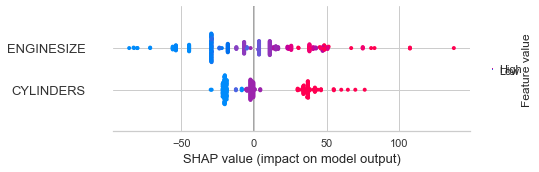

In [96]:
# interpret summary model
interpret_model(saved_final_cat, plot = 'summary')

In [5]:
create_app(saved_final_cat)

Found credentials in shared credentials file: ~/.aws/credentials


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
!pip install -U gradio uvicorn fastapi


In [1]:
interpret_model?

Object `interpret_model` not found.
